In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.pipeline import Pipeline

In [8]:
x = 6 * np.random.rand(200,1) - 3
y = 0.8 * x**2 +0.9*x + 2 + np.random.randn(200,1)

# y = 0.8x2 + 0.9x + 2

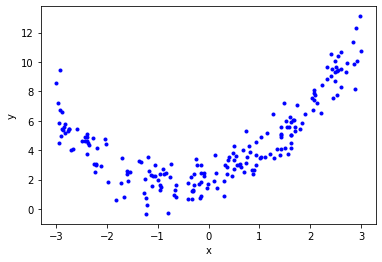

In [16]:
plt.plot(x,y,'b.')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(x_test)

In [23]:
r2_score(y_test,y_pred)

-0.07895626303186876

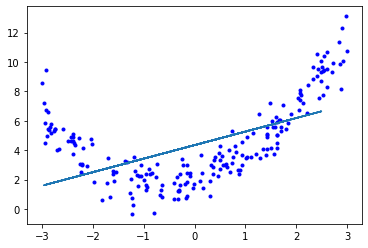

In [26]:
plt.plot(x,y,'b.')
plt.plot(x_test,y_pred )

# applying polynomial linear Regression

In [29]:
# polynomial transform apply on input column only
poly = PolynomialFeatures(degree = 2)

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

In [33]:
x_train_trans.shape

(160, 3)

In [34]:
x_test_trans.shape

(40, 3)

In [35]:
x_train[0]

array([2.50802806])

In [36]:
x_train_trans[0]

array([1.        , 2.50802806, 6.29020473])

In [37]:
lr.fit(x_train_trans,y_train)

LinearRegression()

In [38]:
y_pred1 = lr.predict(x_test_trans)

In [39]:
r2_score(y_test,y_pred1)

0.8255821326252393

In [42]:
lr.coef_

array([[0.        , 0.92575855, 0.75407097]])

In [43]:
lr.intercept_

array([2.03108368])

In [53]:
x_new=np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)

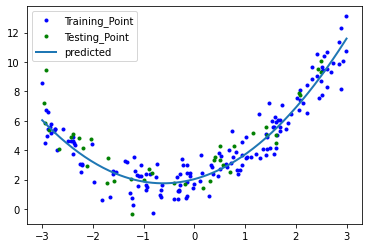

In [54]:
plt.plot(x_train,y_train,'b.',label = 'Training_Point')
plt.plot(x_test,y_test,'g.',label = 'Testing_Point')
plt.plot(x_new,y_new,linewidth=2,label = 'predicted')
plt.legend()
plt.show()

In [55]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(x_new)
    plt.plot(x_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

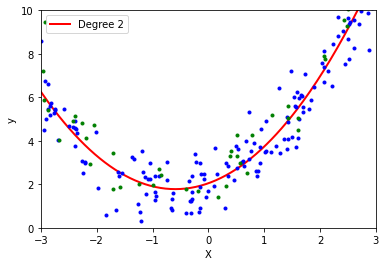

In [58]:
polynomial_regression(2)